# 1. Import Libraries




In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# 2. Load and Preprocess the Dataset

In [18]:
df = pd.read_csv("Insurance claims data.csv")
df.head(30)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
5,POL053680,3.1,2.0,36,C7,6112,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0
6,POL053943,4.5,2.4,38,C2,27003,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
7,POL002857,10.7,2.0,56,C2,27003,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,POL028225,10.7,0.6,55,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,0
9,POL047631,0.3,2.4,45,C3,4076,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [21]:
df.tail()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
58587,10.6,2.6,48,17,34738,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0
58588,2.3,2.2,37,15,4076,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
58589,6.6,2.2,35,20,8794,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0
58590,4.1,3.6,44,20,8794,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0
58591,3.1,0.4,49,3,34791,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0


In [23]:
df.shape

(58592, 40)

In [25]:
df.sample(5)

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
9803,2.5,0.6,60,20,8794,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
49327,11.1,3.2,46,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
1077,6.0,3.6,43,17,34738,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0
13657,2.6,1.6,47,13,3264,1,9,0,6,3,...,0,1,1,1,0,0,1,1,2,0
45212,10.5,0.4,56,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   subscription_length               58592 non-null  float64
 1   vehicle_age                       58592 non-null  float64
 2   customer_age                      58592 non-null  int64  
 3   region_code                       58592 non-null  int32  
 4   region_density                    58592 non-null  int64  
 5   segment                           58592 non-null  int32  
 6   model                             58592 non-null  int32  
 7   fuel_type                         58592 non-null  int32  
 8   max_torque                        58592 non-null  int32  
 9   max_power                         58592 non-null  int32  
 10  engine_type                       58592 non-null  int32  
 11  airbags                           58592 non-null  int64  
 12  is_e

In [27]:
df.describe()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,...,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,13.035653,18826.858667,1.938644,4.659237,1.003448,3.288538,3.317057,...,0.549171,0.724246,0.724246,0.979366,0.585251,0.380308,0.724246,0.993805,1.759950,0.063968
std,4.142790,1.134413,6.935604,6.803915,17660.174792,1.566329,3.197355,0.835104,2.440212,2.566569,...,0.497581,0.446897,0.446897,0.142158,0.492683,0.485467,0.446897,0.078467,1.389576,0.244698
min,0.000000,0.000000,35.000000,0.000000,290.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6.000000,6112.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,15.000000,8794.000000,2.000000,5.000000,1.000000,4.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,20.000000,27003.000000,4.000000,7.000000,2.000000,5.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,21.000000,73430.000000,5.000000,10.000000,2.000000,8.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


# MISSING VALUES

In [28]:
df.isnull().sum()

subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight                        0
is_front_fog

In [20]:


import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("Insurance claims data.csv")


df.drop(columns=["policy_id"], inplace=True)

binary_cols = df.columns[df.isin(["Yes", "No"]).any()]
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

cat_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('claim_status', axis=1)
y = df['claim_status']



# 3. Train-Test Split and Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Imbalance data

In [8]:
import pandas as pd


df = pd.read_csv("Insurance claims data.csv")


label_counts = df['claim_status'].value_counts(normalize=True) * 100


print("Class distribution (%):")
print(label_counts)


df['claim_status'] = df['claim_status'].astype(int) 


Class distribution (%):
0    93.603222
1     6.396778
Name: claim_status, dtype: float64


In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


print("Original training target distribution:", Counter(y_train))
print("Balanced training target distribution:", Counter(y_train_bal))


Original training target distribution: Counter({0: 43875, 1: 2998})
Balanced training target distribution: Counter({0: 43875, 1: 43875})


# 4. Baseline Classifier (Logistic Regression)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before balancing:", Counter(y_train))
print("After balancing:", Counter(y_train_bal))


model = LogisticRegression(max_iter=1000, class_weight='balanced')  
model.fit(X_train_bal, y_train_bal)


y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Before balancing: Counter({0: 43875, 1: 2998})
After balancing: Counter({0: 43875, 1: 43875})

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.55      0.70     10969
           1       0.09      0.62      0.15       750

    accuracy                           0.55     11719
   macro avg       0.52      0.58      0.42     11719
weighted avg       0.90      0.55      0.66     11719



#  5. Artificial Neural Network (ANN)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(1, activation='sigmoid'))


ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = ann.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)


C:\Users\ideal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9166 - loss: 0.2909 - val_accuracy: 0.9412 - val_loss: 0.2224
Epoch 2/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9356 - loss: 0.2454 - val_accuracy: 0.9412 - val_loss: 0.2208
Epoch 3/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9356 - loss: 0.2431 - val_accuracy: 0.9412 - val_loss: 0.2197
Epoch 4/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9363 - loss: 0.2383 - val_accuracy: 0.9412 - val_loss: 0.2201
Epoch 5/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9355 - loss: 0.2400 - val_accuracy: 0.9412 - val_loss: 0.2207
Epoch 6/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9320 - loss: 0.2485 - val_accuracy: 0.9412 - val_loss: 0.2195
Epoch 7/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9335 - loss: 0.2453 - val_accuracy: 0.9412 - val_loss: 0.2201
Epoch 8/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9366 - loss: 0.2360 - val_accuracy: 0.

#  6. Evaluate ANN

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_bal))

model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_bal, y_train_bal)


y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Before SMOTE: Counter({0: 43875, 1: 2998})
After SMOTE: Counter({0: 43875, 1: 43875})

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70     10969
           1       0.09      0.62      0.15       750

    accuracy                           0.55     11719
   macro avg       0.52      0.58      0.42     11719
weighted avg       0.90      0.55      0.66     11719


Confusion Matrix:
[[6018 4951]
 [ 288  462]]


In [15]:

loss, accuracy = ann.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


y_pred_ann = (ann.predict(X_test) > 0.5).astype("int32")
print("ANN Classification Report:\n")
print(classification_report(y_test, y_pred_ann))


367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9390 - loss: 0.2246
Test Accuracy: 0.9360
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
ANN Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



C:\Users\ideal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ideal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ideal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# confusion matrix 

367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step


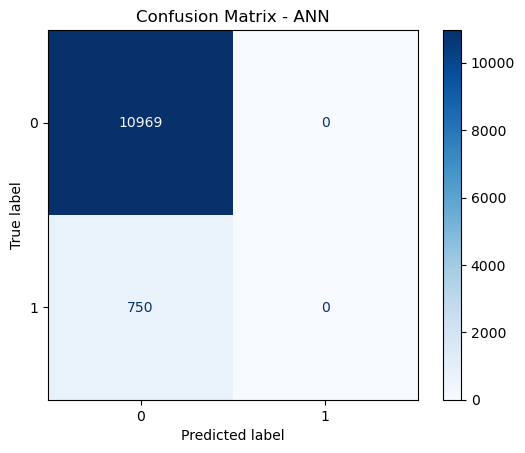

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred_ann = (ann.predict(X_test) > 0.5).astype("int32")


cm = confusion_matrix(y_test, y_pred_ann)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - ANN")
plt.show()


# random forest

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10969
           1       0.13      0.02      0.03       750

    accuracy                           0.93     11719
   macro avg       0.53      0.51      0.50     11719
weighted avg       0.89      0.93      0.90     11719



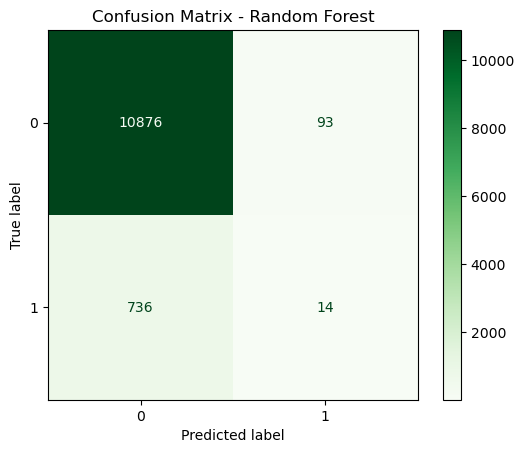

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Random Forest")
plt.show()
